# **Initialization and Collecting CIFAR10 Dataset**

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

**Plot some images from the dataset to visualize the dataset**

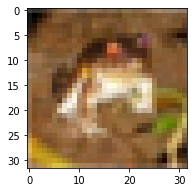

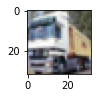

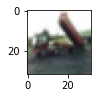

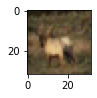

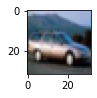

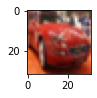

In [ ]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

**Import the required layers and modules to create our convolution neural net architecture**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

**Convert the pixel values of the dataset to float type and then normalize the dataset**

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

**Now perform the one-hot encoding for target classes**

In [ ]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

**Create the sequential model and add the layers**

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

**Configure the optimizer and compile the model**

In [ ]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**View the model summary for better understanding of model architecture**

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)              

# **Train the model**

In [ ]:
model.fit(train_X,train_Y, validation_data=(test_X,test_Y), epochs=500,batch_size=32)

Epoch 1/500
1563/1563 [==============================] - 50s 11ms/step - loss: 1.9052 - accuracy: 0.3074 - val_loss: 1.3606 - val_accuracy: 0.5014
Epoch 2/500
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3754 - accuracy: 0.5067 - val_loss: 1.1936 - val_accuracy: 0.5785
Epoch 3/500
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1565 - accuracy: 0.5896 - val_loss: 1.0863 - val_accuracy: 0.6122
Epoch 4/500
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0231 - accuracy: 0.6385 - val_loss: 0.9950 - val_accuracy: 0.6436
Epoch 5/500
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9115 - accuracy: 0.6766 - val_loss: 0.9556 - val_accuracy: 0.6685
Epoch 6/500
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8360 - accuracy: 0.7051 - val_loss: 0.9287 - val_accuracy: 0.6724
Epoch 7/500
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7546 - accuracy: 0.7325 - val_loss: 0

# **Calculate its accuracy on testing data**

In [ ]:
loss, acc=model.evaluate(test_X,test_Y)
acc

313/313 [==============================] - 2s 5ms/step - loss: 1.4287 - accuracy: 0.7158


0.7157999873161316

In [ ]:
#Model evaluation
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 71.58%


**Save the model**

In [ ]:
model.save("model1_cifar_10epoch.h5")